In [2]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
#time package to calculate time required to train model
import time
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [3]:
!pwd

/home/k3xri/Desktop/exm/submission/AI_PRAC_40m


In [4]:
#MNIST dataset is downloaded in locally 
df = pd.read_csv('Train_UQcUa52/train.csv')
df.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [5]:
imagepath='Train_UQcUa52/Images/train/'

In [6]:
#Read/load MNIST data set and scale 
X = np.array([img_to_array(load_img(imagepath+df['filename'][i], target_size=(28,28,1), grayscale=True))
              for i in tqdm(range(df.shape[0]))
              ]).astype('float32')

  0%|          | 0/49000 [00:00<?, ?it/s]

In [7]:
y = df['label']

In [8]:
print(X.shape, y.shape)

(49000, 28, 28, 1) (49000,)


4


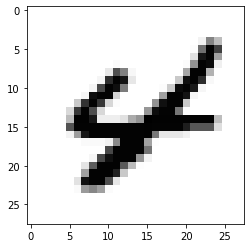

In [9]:
image_index = 0
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')


2


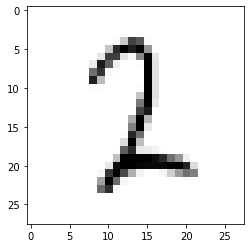

In [10]:
image_index = 10
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

1


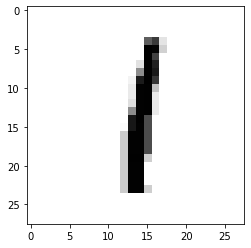

In [11]:
image_index = 192
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=np.array(y))

In [21]:
#cant understand what youtuber did
x_train /= 255
x_test /= 255

In [15]:
input_shape = (28,28,1)
output_class = 10

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# define the model
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(output_class, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [17]:
# train the model
start_time = time.time()
model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test))
print("Training model took %s Seconds" % (time.time() - start_time))

Epoch 1/30
1149/1149 [==============================] - 38s 32ms/step - loss: 0.2870 - accuracy: 0.9136 - val_loss: 0.1175 - val_accuracy: 0.9655
Epoch 2/30
1149/1149 [==============================] - 39s 34ms/step - loss: 0.1215 - accuracy: 0.9625 - val_loss: 0.0855 - val_accuracy: 0.9740
Epoch 3/30
1149/1149 [==============================] - 37s 32ms/step - loss: 0.0877 - accuracy: 0.9725 - val_loss: 0.0766 - val_accuracy: 0.9755
Epoch 4/30
1149/1149 [==============================] - 36s 32ms/step - loss: 0.0676 - accuracy: 0.9778 - val_loss: 0.0718 - val_accuracy: 0.9775
Epoch 5/30
1149/1149 [==============================] - 39s 34ms/step - loss: 0.0540 - accuracy: 0.9823 - val_loss: 0.0646 - val_accuracy: 0.9815
Epoch 6/30
1149/1149 [==============================] - 42s 37ms/step - loss: 0.0471 - accuracy: 0.9848 - val_loss: 0.0774 - val_accuracy: 0.9767
Epoch 7/30
1149/1149 [==============================] - 40s 35ms/step - loss: 0.0387 - accuracy: 0.9870 - val_loss: 0.0708 -

#Training model took 1283.099246263504 Seconds

In [24]:
image_index = 10
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())

AttributeError: 'Sequential' object has no attribute 'evalute'

Predicted output: 8


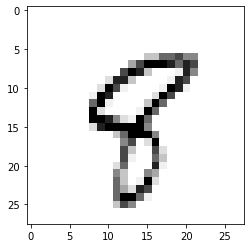

In [19]:
image_index = 100
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())

In [26]:
testloss , testacc = model.evaluate(x_test,y_test)
print("test loss on sample ",testloss)
print("test accuracy", testacc)

383/383 [==============================] - 4s 11ms/step - loss: 3.3432 - accuracy: 0.1126
test loss on sample  3.3432462215423584
test accuracy 0.11257142573595047


Predicted index array: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Predicted output: 1


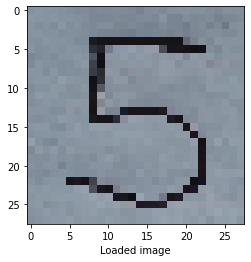

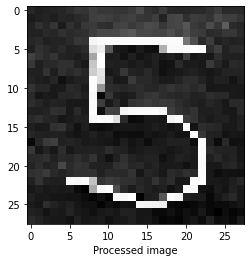

In [46]:
plt.figure()
plt.imshow(load_img("test_image5.jpg", target_size=(28,28,1)))
plt.xlabel('Loaded image')
temp = np.array([img_to_array(load_img("test_image5.jpg", target_size=(28,28,1), grayscale=True))]).astype('float32')
plt.figure()
plt.imshow(temp[0].reshape(28,28), cmap='Greys')
plt.xlabel('Processed image')
pred = model.predict(temp[0].reshape(1,28,28,1))
print("Predicted index array:", pred)
print("Predicted output:", pred.argmax())
